In [9]:
pwd

'c:\\Users\\cutic\\OneDrive\\Escritorio\\Tecnológico de Monterrey\\Octavo semestre\\Desarrollo de aplicaciones avanzadas de ciencias computacionales'

# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



base_dir = os.path.abspath(os.getcwd())

print(base_dir)

train_dir = os.path.join(base_dir,'pandaorbear')
train_dir = os.path.join(train_dir,'Train')
print(train_dir)
test_dir = os.path.join(base_dir,'pandaorbear')
test_dir = os.path.join(test_dir, 'Test')
print(test_dir)
train_datagen = ImageDataGenerator(
							rescale = 1./255,
                            #Agregar rotación aporta variablidad y ayuda a que el modelo sea capaz de reconocer al animal en diferentes orientaciones
							rotation_range = 30,
                            #Hacer estos cambios de posición hacen que el modelo pueda identificar mejor al objeto posicionado en distintas partes de la imagen
							width_shift_range = 0.2,
							height_shift_range = 0.2,
                            #este parametro distorsiona la imagen extendiendola (tilting) hacia un lado. nos puede ayudar a identificar las imagenes en esccenarios de movimiento
							shear_range = 0.2,
                            #Esto ayuda a poder reconocer los animales a diferentes escalas de tamaño en la imagen
							zoom_range = 0.3,
                            #Invertir la imagen ayuda a tener mas variedad de posicionamiento, para poder clasificar mejor en disitntas posiciones
							horizontal_flip = True,)
							



c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\pandaorbear\Train
c:\Users\cutic\OneDrive\Escritorio\Tecnológico de Monterrey\Octavo semestre\Desarrollo de aplicaciones avanzadas de ciencias computacionales\pandaorbear\Test


En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 10508 images belonging to 3 classes.
(8, 150, 150, 3)
[2. 2. 2. 2. 2. 2. 2. 2.]


<Figure size 432x288 with 0 Axes>

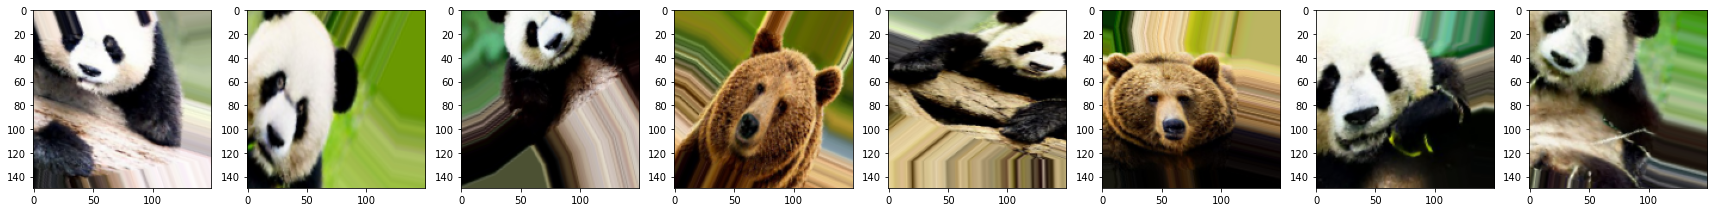

In [24]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo. 

In [19]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 8,
							class_mode ='binary',
							save_to_dir= train_dir + '\\augmented',   
              save_prefix='aug',
              save_format='png'
							)
train_generator


Found 500 images belonging to 3 classes.


Esta es una red neuronal convolutiva:

In [20]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 10)      280       
                                                                 
 flatten_1 (Flatten)         (None, 219040)            0         
                                                                 
 dense_2 (Dense)             (None, 256)               56074496  
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 56,075,033
Trainable params: 56,075,033
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
63/63 [==============================] - 38s 553ms/step - loss: 0.4298 - acc: 0.8240
Epoch 2/20
63/63 [==============================] - 41s 643ms/step - loss: 0.1890 - acc: 0.9360
Epoch 3/20
63/63 [==============================] - 41s 647ms/step - loss: 0.1527 - acc: 0.9480
Epoch 4/20
63/63 [==============================] - 40s 628ms/step - loss: 0.1213 - acc: 0.9460
Epoch 5/20
63/63 [==============================] - 44s 696ms/step - loss: 0.1206 - acc: 0.9720
Epoch 6/20
63/63 [==============================] - 39s 609ms/step - loss: 0.1179 - acc: 0.9600
Epoch 7/20
63/63 [==============================] - 37s 578ms/step - loss: 0.1510 - acc: 0.9580
Epoch 8/20
63/63 [==============================] - 43s 679ms/step - loss: 0.1289 - acc: 0.9680
Epoch 9/20
63/63 [==============================] - 43s 675ms/step - loss: 0.0974 - acc: 0.9720
Epoch 10/20
63/63 [==============================] - 42s 661ms/step - loss: 0.1026 - acc: 0.9700
Epoch 11/20
63/63 [====================

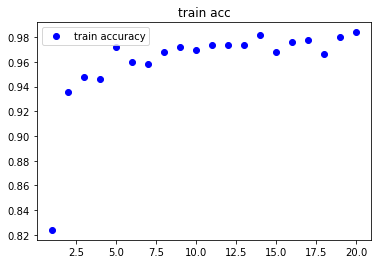

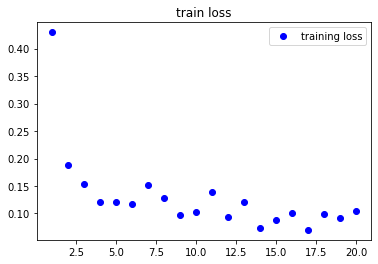

In [21]:

history = model.fit(
						train_generator, 
						epochs = 20)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

In [17]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
25/25 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - acc: 1.0000

test acc :
 1.0


In [18]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 100 images belonging to 2 classes.
25/25 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - acc: 1.0000

test acc :
 1.0
